In [40]:
import matplotlib.pyplot as plt
import pickle
import os
from tqdm import tqdm
import numpy as np

In [9]:
p = {}
t = {}
for fname in (os.listdir('outputs/')):
    if 'mapped' in fname:
        f = open('outputs/' + fname, 'rb')
        p[str(fname)] = pickle.load(f)
    if 'time' in fname:
        f = open('outputs/' + fname, 'rb')
        t[str(fname)] = pickle.load(f)

In [10]:
p.keys()

dict_keys(['docword.kos._0.1_5_mapped.pickle', 'docword.kos._0.25_5_mapped.pickle', 'docword.kos._0.2_5_mapped.pickle', 'docword.kos._0.3_5_mapped.pickle', 'docword.nips._0.45_5_mapped.pickle', 'docword.nips._0.4_5_mapped.pickle', 'docword.nips._0.5_5_mapped.pickle', 'docword.nips._0.6_5_mapped.pickle'])

In [96]:
# plots for number of candidate set generated
def get_item_info(s):
    l_s = {}
    for k, v in p.items():
        if s in k:
            l_s[float(k.split('_')[1])]  = {}
            for i,val in v.items():
                l_s[float(k.split('_')[1])][i] = len(val)
    return l_s 

def plot_item_info(l_s):
    for k,v in l_s.items():
        plt.plot([len_ for len_ in l_s[k].keys()], np.log([l_s[k][len_item] for len_item in l_s[k].keys()]), label = 'sup = {}'.format(k))
        plt.legend()
        plt.xlabel('Length of itemset')
        plt.ylabel('Number of itemsets generated (log scale)')
    return


def get_time_info(s):
    t_s = {}
    for k,v in t.items():
        if s in k:
            t_s[float(k.split('_')[1])] = t[k]
    return t_s

def plot_time_info(t_s):
    for k,v in t_s.items():
        plt.plot(list(range(1,len(v)+1)), np.log(v), label = 'sup = {}'.format(k))
        plt.xlabel('Length of itemset')
        plt.ylabel('Time taken')
        plt.legend
    return

In [27]:
l_kos = get_item_info('kos')
l_nips = get_item_info('nips')

C:\Users\ashis\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
C:\Users\ashis\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
C:\Users\ashis\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


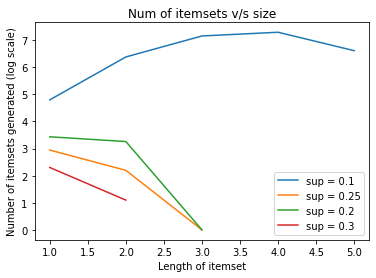

In [56]:
plt.title('Num of itemsets v/s size')
plot_item_info(l_kos)
plt.savefig('plots/kos_itemset.png')

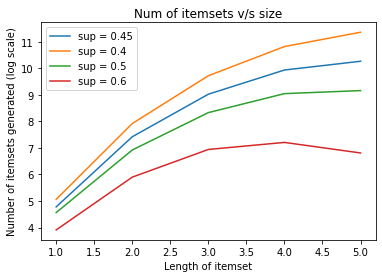

In [57]:
plt.title('Num of itemsets v/s size')
plot_item_info(l_nips)
plt.savefig('plots/nips_itemset.png')

In [78]:
t_kos = get_time_info('kos')
t_nips = get_time_info('nips')

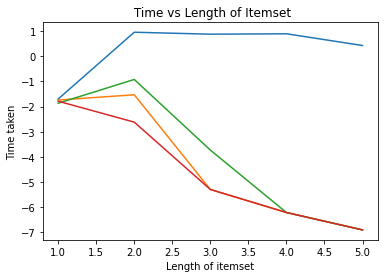

In [98]:
plt.title(' Time vs Length of Itemset')
plot_time_info(t_kos)
plt.savefig('plots/kos_time.png')

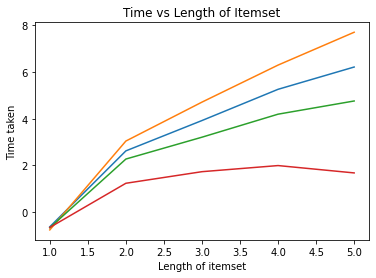

In [99]:
plt.title('Time vs Length of Itemset')
plot_time_info(t_nips)
plt.savefig('plots/nips_time.png')